In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [35]:
df = pd.read_csv("patents_cleaned.csv")

In [36]:
citation_columns = [
    'patent_num_cited_by_us_patents',
    'patent_num_combined_citations',
    'patent_num_foreign_citations',
    'patent_num_us_application_citations',
    'patent_num_us_patent_citations',
]

cleaned_data = df[citation_columns].dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_data)


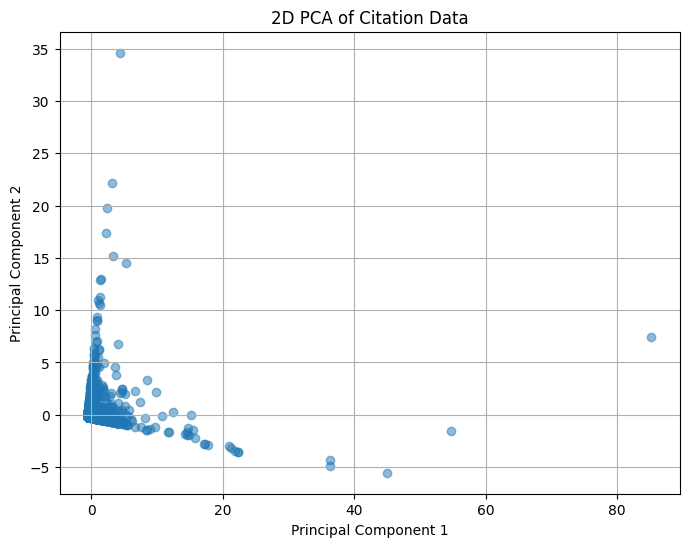

In [37]:
pca2d = PCA(n_components=2)
pca2d_result = pca2d.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca2d_result[:, 0], pca2d_result[:, 1], alpha=0.5)
plt.title("2D PCA of Citation Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

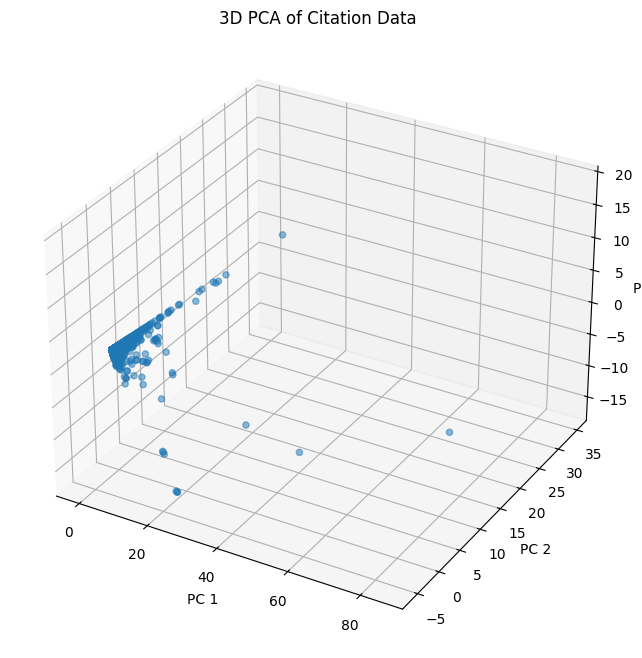

In [38]:
pca3d = PCA(n_components=3)
pca3d_result = pca3d.fit_transform(scaled_data)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca3d_result[:, 0], pca3d_result[:, 1], pca3d_result[:, 2], alpha=0.5)
ax.set_title("3D PCA of Citation Data")
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
plt.show()

In [39]:
var2d = pca2d.explained_variance_ratio_.sum()
var3d = pca3d.explained_variance_ratio_.sum()

pcafull = PCA().fit(scaled_data)
cvar = pcafull.explained_variance_ratio_.cumsum()

c95 = next(i for i, variance in enumerate(cvar) if variance >= 0.95) + 1

top3 = pcafull.explained_variance_[:3]

print(f"Explained variance (2D): {var2d * 100:.2f}%")
print(f"Explained variance (3D): {var3d * 100:.2f}%")
print(f"Number of components to retain 95% variance: {c95}")
print(f"Top 3 eigenvalues: {top3}")

Explained variance (2D): 89.40%
Explained variance (3D): 97.68%
Number of components to retain 95% variance: 3
Top 3 eigenvalues: [3.51671657 0.95403248 0.41399137]
